In [38]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import librosa
import librosa.display
import skimage

# Load audio

In [39]:
'''
librosa.load(path, *, 
             sr=22050, 
             mono=True, 
             offset=0.0, 
             duration=None, 
             dtype=<class 'numpy.float32'>, 
             res_type='kaiser_best')

sr is TARGET SAMPLING RATE. If none, you get the native sampling rate
'''

data, sampling_rate = librosa.load(path = './audio_files_jackhammer.wav')


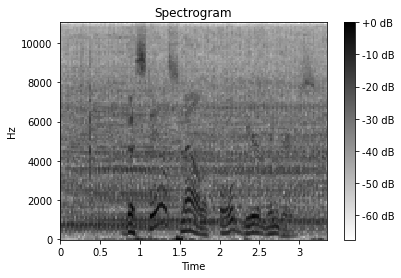

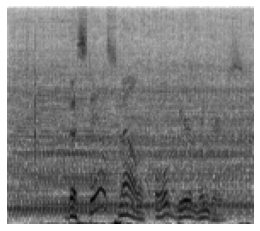

In [42]:
'''
librosa.feature.melspectrogram(*, 
                               y=None, 
                               sr=22050, 
                               S=None, 
                               n_fft=2048, 
                               hop_length=512, 
                               win_length=None, 
                               window='hann', 
                               center=True, 
                               pad_mode='constant', 
                               power=2.0, 
                               **kwargs)
'''

N_FFT = 1024
HOP = 512

log_melspec = librosa.feature.melspectrogram(y=data, 
                               sr=sampling_rate,  
                               n_fft=N_FFT, 
                               hop_length=HOP)

log_melspec = librosa.power_to_db(log_melspec, ref=np.max)

# not sure if this is necessary:
# log_melspec = np.log(log_melspec + 1e-9) # add small number to avoid log(0)

#save to image
def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

# min-max scale to fit inside 8-bit range
img = scale_minmax(log_melspec, 0, 255).astype(np.uint8)
img = np.flip(img, axis=0) # put low frequencies at the bottom in image
output_path = './spec1.png'
skimage.io.imsave(output_path, img)

fig, ax = plt.subplots()
spc = librosa.display.specshow(log_melspec,y_axis='linear', x_axis='time', ax=ax, cmap='gray_r')
ax.set_title('Spectrogram')
fig.colorbar(spc, ax=ax, format="%+2.0f dB")
plt.show()

#if you want to save the plotted version and choose a colormap
#plt.axis('off')
#plt.imsave(output_path, img, format="png", cmap="hot")

img = mpimg.imread('./spec1.png')
imgplot = plt.imshow(img, cmap='gray_r')
plt.axis('off')
plt.show()

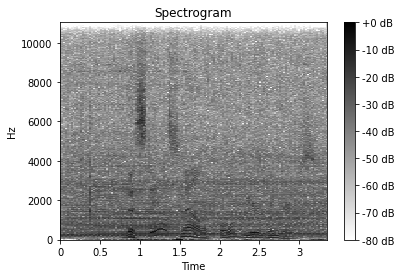

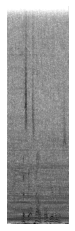

In [45]:
'''
_spectrogram(
    *,
    y=None,
    S=None,
    n_fft=2048,
    hop_length=512,
    power=1,
    win_length=None,
    window="hann",
    center=True,
    pad_mode="constant",
):
'''

N_FFT = 1024
HOP = 512

mag_spectrum, _ = librosa.core.spectrum._spectrogram(y=data, n_fft=N_FFT, hop_length=HOP)
mag_spectrum = librosa.amplitude_to_db(mag_spectrum, ref=np.max)

#save to image
def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

# min-max scale to fit inside 8-bit range
img = scale_minmax(mag_spectrum, 0, 255).astype(np.uint8)
img = np.flip(img, axis=0) # put low frequencies at the bottom in image
output_path = './spec2.png'
skimage.io.imsave(output_path, img)

fig, ax = plt.subplots()
img = librosa.display.specshow(mag_spectrum, y_axis='linear', x_axis='time', ax=ax, cmap='gray_r')
ax.set_title('Spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

#if you want to save the plotted version and choose a colormap
#plt.axis('off')
#plt.imsave(output_path, img, format="png", cmap="hot")

img = mpimg.imread('./spec2.png')
imgplot = plt.imshow(img, cmap='gray_r')
plt.axis('off')
plt.show()

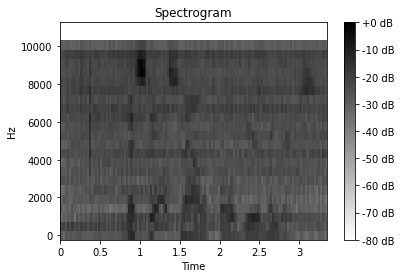

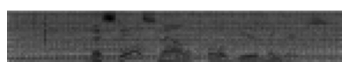

In [49]:
bark_bands = [
        100, 200, 300, 400, 510, 630, 770, 920, 1080, 1270,
        1480, 1720, 2000, 2320, 2700, 3150, 3700, 4400, 5300,
        6400, 7700, 9500, 12000, 15500,
    ]

N_FFT = 1024
HOP = 512

spectrogram, _ = librosa.core.spectrum._spectrogram(y=data, n_fft=N_FFT, hop_length=HOP)
frequencies = librosa.core.fft_frequencies(sr=sampling_rate, n_fft=N_FFT)

assert spectrogram.shape[0] == frequencies.shape[0], "Different number of frequencies..."

# Initialise the output. It will be of shape [n_bark_bands, t]
output = np.zeros((len(bark_bands), spectrogram.shape[1]), dtype=spectrogram.dtype)

for band_idx in range(len(bark_bands) - 1):
    # Sum everything that falls in this bucket.
    output[band_idx] = np.sum(
        spectrogram[((frequencies >= bark_bands[band_idx]) & (frequencies < bark_bands[band_idx + 1]))], axis=0
    )
        
bark_spectrogram = librosa.amplitude_to_db(output, ref=np.max)



#save to image
def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

# min-max scale to fit inside 8-bit range
img = scale_minmax(bark_spectrogram, 0, 255).astype(np.uint8)
img = np.flip(img, axis=0) # put low frequencies at the bottom in image
output_path = './spec3.png'
skimage.io.imsave(output_path, img)

#librosa.display.specshow(data, *, x_coords=None, y_coords=None, x_axis=None, y_axis=None, sr=22050, hop_length=512, n_fft=None, win_length=None, fmin=None, fmax=None, tuning=0.0, bins_per_octave=12, key='C:maj', Sa=None, mela=None, thaat=None, auto_aspect=True, htk=False, unicode=True, ax=None, **kwargs)


fig, ax = plt.subplots()
img = librosa.display.specshow(bark_spectrogram, y_axis='linear', x_axis='time', ax=ax, cmap='gray_r')
ax.set_title('Spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

#if you want to save the plotted version and choose a colormap
#plt.axis('off')
#plt.imsave(output_path, img, format="png", cmap="hot")


img = mpimg.imread('./spec3.png')
imgplot = plt.imshow(img, cmap='gray_r')
plt.axis('off')
plt.show()


